# Task 1: Prediction using supervised machine learning

   # Author: Muskan Patel
    
   # GRIP The Spark Foundation
    
   # Business Analytics and Data Science Internship
   

In [ ]:
#Import necessary libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the csv dataset as a panads dataframe

data=pd.read_csv('student_scores - student_scores.csv')
data.head()  #check top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#View the shape i.e number of rows,columns
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


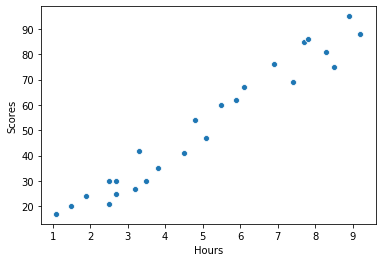

In [8]:
#Visualize the data
sns.scatterplot(x=data['Hours'], y=data['Scores']);

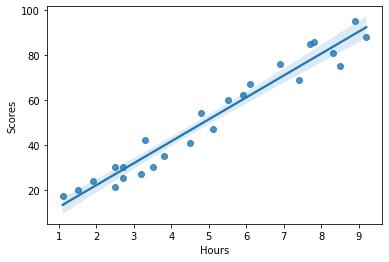

In [9]:
#Regression plot gives a better and clear visualization for such data
sns.regplot(x=data['Hours'],y=data['Scores']);

In [16]:
#Separate feature and target
x=data[['Hours']]
y=data['Scores']

In [17]:
#Train-Test Split
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(x, y, random_state = 0)

In [18]:
#Model Building
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [19]:
#train the model
regressor.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Prediction
pred_y = regressor.predict(val_x)

In [21]:
#view actual and predicted an test set side-by-side
pd.DataFrame({'Actual':val_y,'Predicted':pred_y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


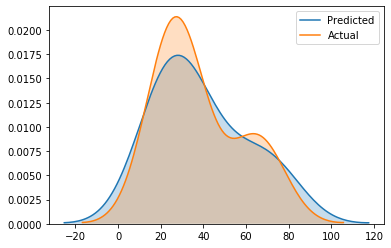

In [22]:
#Actual vs Predicted distribution plot
sns.kdeplot(pred_y,label="Predicted",shade='True');
sns.kdeplot(data=val_y,label="Actual",shade='True' );

In [23]:
print('Train accuracy: ',regressor.score(train_x,train_y),'\nTest accuracy :', regressor.score(val_x,val_y))

Train accuracy:  0.9484509249326872 
Test accuracy : 0.9367661043365054


In [28]:
#Predict percent for custom input value for hours
#Q. What will be preducted score if astudent studies for 9.25 hrs/day?

h=[[9.25]]
s=regressor.predict(h)
print('A student who studies ',h[0][0], 'hours is estimated to score', s[0])

A student who studies  9.25 hours is estimated to score 93.89272889341655
